# Data Science Lab Assignment-3.1
#### Name: Venkata Sai Manoj Boganadham
#### Section: A 
#### Roll no: 197121
## 1. Simple Linear Regression on Simple Salary Dataset from Kaggle

Dataset link - https://www.kaggle.com/karthickveerakumar/salary-data-simple-linear-regression


### First we need to import the dataset

In [9]:
# importing required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math

# Import the dataset
raw_data = pd.read_csv("Salary_Data.csv")
print("Shape of the data (rows, columns):", raw_data.shape)

Shape of the data (rows, columns): (30, 2)


### Separate the dataset into training data and test data

In [11]:
# sample() method samples the tuples from a given dataframe 
# Returns a random sample of items from an axis of object
# You can use random_state for reproducibility
# From the raw_data, we will drop the indices present in the train_data to create the test_data

# sampling 80% of data from raw_data as training data
train_data = raw_data.sample(frac=0.8, random_state=25)
# rest is made the test data
test_data = raw_data.drop(train_data.index)

# printing the splitted dataset
print("Train data:")
print(train_data.shape)
print("Test data:")
print(test_data.shape)

Train data:
(24, 2)
Test data:
(6, 2)


### Assign the values to independent variable and dependent variable

In [12]:
# supress the scientific notation when converting dataframe into numpy array while printing
np.set_printoptions(suppress=True)
# creating the numpy arrays from the pandas dataframe
train_arr = train_data.values
print(type(train_arr))
# creating the independent and dependent variables from the train data
[x_train, y_train] = np.split(train_arr, 2, axis = 1)
print("Independent variables")
print(x_train.shape)
print("Dependent variables")
print(y_train.shape)

<class 'numpy.ndarray'>
Independent variables
(24, 1)
Dependent variables
(24, 1)


### Print the first few rows

In [4]:
# head() method prints the first few rows
raw_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### Plot the dataset (train dataset)( independent variable vs dependent variable)

By plotting the data, we will try to find a suitable model to fit the data

Plotting the total dataframe


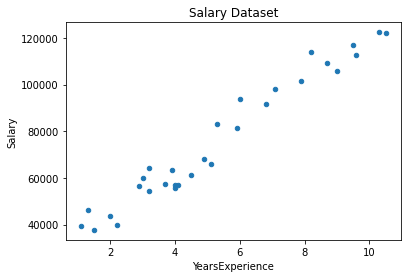

In [5]:
print("Plotting the total dataframe")

# creating the plot
raw_data.plot(kind='scatter', x = 'YearsExperience', y = 'Salary')
plt.title("Salary Dataset")
# showing the plot created
plt.show()

From the plot, our primary guess is that the data is scattered in a linear fashion. Now, let us try to fit a Linear Model using simple Linear Regression. 

## Initialising the parameters and fitting the model

### Training the model

In [16]:
# Initialising slope and intercept of the line
slope = 0
intercept = 0

# Initialising learning rate
alpha = 0.05
epochs = 1000

# number of rows
m = x_train.shape[0]

# call the model function
# batch gradient descent model
for i in range(0, epochs):
  # updating slope
  pd_factor = (slope*x_train+intercept)-y_train
  slope = slope - alpha*((pd_factor*x_train).sum())/m
  # updating intercept
  intercept = intercept - alpha*(pd_factor.sum())/m

  print( "At epoch ",i," cost is: ", (np.mean((slope*x_train + intercept - y_train)**2)/2))

print()
print("Slope: ", slope, "Intercept: ", intercept)


At epoch  0  cost is:  1728625835.5126
At epoch  1  cost is:  981260133.5769426
At epoch  2  cost is:  573271602.6611623
At epoch  3  cost is:  350232450.4971302
At epoch  4  cost is:  227991759.96756852
At epoch  5  cost is:  160693785.01053312
At epoch  6  cost is:  123350531.24244635
At epoch  7  cost is:  102345234.20235704
At epoch  8  cost is:  90257529.68352126
At epoch  9  cost is:  83043593.62879997
At epoch  10  cost is:  78499548.28888525
At epoch  11  cost is:  75424143.78969495
At epoch  12  cost is:  73162487.74424706
At epoch  13  cost is:  71357414.96088468
At epoch  14  cost is:  69814004.06523494
At epoch  15  cost is:  68425749.96145123
At epoch  16  cost is:  67134333.69849019
At epoch  17  cost is:  65907700.184105545
At epoch  18  cost is:  64728112.185293555
At epoch  19  cost is:  63585640.59403995
At epoch  20  cost is:  62474617.01721197
At epoch  21  cost is:  61391700.59445554
At epoch  22  cost is:  60334824.4416309
At epoch  23  cost is:  59302621.4213145


The parameters Slope and Intercept are not having significant change even if number epochs is increased. So we consider these values as optimal for Linear Regression to this data set 

### Using the model to test on the test data

In [17]:
# Creating the test data array
# creating the numpy arrays from the pandas dataframe
test_arr = test_data.values
print(type(train_arr))
# creating the independent and dependent variables from the train data
[x_test, y_test] = np.split(test_arr, 2, axis = 1)

# Using the learned parameters to predict the values
prediction = slope*x_test + intercept


<class 'numpy.ndarray'>


### Plotting the line fitted by the model

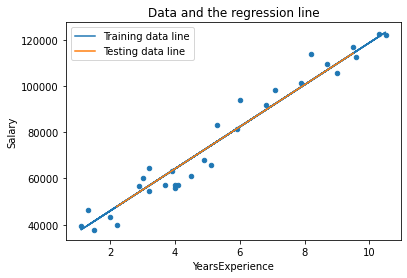

In [23]:
# First plotting the data
raw_data.plot(kind='scatter', x = 'YearsExperience', y = 'Salary')
# Now plot the line fitted by the model
# Plot the line using training data
plt.plot(x_train, slope*x_train + intercept, label = "Training data line")
# We are using the test data to plot the line
plt.plot(x_test, slope*x_test + intercept, label = "Testing data line")
plt.title("Data and the regression line")
plt.legend()
plt.show()

## Calculating the accuracy of the model

In [24]:
# calculating the accuracy of the model using the Root Mean Squared Error
import math
error = math.sqrt(np.mean((y_test - prediction)**2))

print("Root Mean Squared error of the model: ", error)

Root Mean Squared error of the model:  6798.081139535493



# 2. Multi Variate Linear Regression on Boston Housing Dataset from Kaggle

First, let us import the required modules and the data

In [26]:
# Importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math

# Import the dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
raw_data = pd.read_csv("housing.csv",header=None, delimiter=r"\s+", names = column_names)
print("Shape of the data (rows, columns): ", raw_data.shape)
print()
print(raw_data.head())

# Describing the data
print("Statistics of the data")
raw_data.describe()

Shape of the data (rows, columns):  (506, 14)

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
Statistics of the data


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Feature scaling
Scaling the dataset (standardization of data).
Here, we are using the Z-score Normalization technique to normalize all the columns

In [63]:
# Copying the original data into a new data frame
norm_data = raw_data.copy()

# Applying the z-score normalization on each column
for column in column_names:
  if column != column_names[-1]:
    norm_data[column] = (norm_data[column] - norm_data[column].mean()) / norm_data[column].std()

print(norm_data[:5])


       CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0 -0.419367  0.284548 -1.286636 -0.272329 -0.144075  0.413263 -0.119895   
1 -0.416927 -0.487240 -0.592794 -0.272329 -0.739530  0.194082  0.366803   
2 -0.416929 -0.487240 -0.592794 -0.272329 -0.739530  1.281446 -0.265549   
3 -0.416338 -0.487240 -1.305586 -0.272329 -0.834458  1.015298 -0.809088   
4 -0.412074 -0.487240 -1.305586 -0.272329 -0.834458  1.227362 -0.510674   

        DIS       RAD       TAX   PTRATIO         B     LSTAT  MEDV  
0  0.140075 -0.981871 -0.665949 -1.457558  0.440616 -1.074499  24.0  
1  0.556609 -0.867024 -0.986353 -0.302794  0.440616 -0.491953  21.6  
2  0.556609 -0.867024 -0.986353 -0.302794  0.396035 -1.207532  34.7  
3  1.076671 -0.752178 -1.105022  0.112920  0.415751 -1.360171  33.4  
4  1.076671 -0.752178 -1.105022  0.112920  0.440616 -1.025487  36.2  


#### Splitting the normalized dataset into training and testing data

In [64]:
# Randomly sampling the normalized data (rows) into training and the test datasets.
# 80% - Training data; 20% - Testing data
train_data = norm_data.sample(frac = 0.8, random_state = 69)


# We form the test data by dropping the rows present in the training data from the normalized data frame
test_data = norm_data.drop(train_data.index)

# First split the dataframe and then convert the pandas dataframe into numpy array
shape_tup = train_data.shape
rows = shape_tup[0]
cols = shape_tup[1]
x_train_data = train_data.iloc[:, :cols-1]
y_train_data = train_data.iloc[:, cols-1:cols]
x_train = x_train_data.values
y_train = y_train_data.values

# Supressing the scientific notation while printing the numpy arrays
np.set_printoptions(suppress=True)

# Printing the x and y of traning data
print("X of the train data:")
print(x_train.shape)
print("Y of the train data:")
print(y_train.shape)

# Similarly, dividing the test data
shape_tup = test_data.shape
rows = shape_tup[0]
cols = shape_tup[1]
x_test_data = test_data.iloc[:, :cols-1]
y_test_data = test_data.iloc[:, cols-1:cols]
x_test = x_test_data.values
y_test = y_test_data.values

print("X of the test data:")
print(x_test.shape)
print("Y of the test data:")
print(y_test.shape)

X of the train data:
(405, 13)
Y of the train data:
(405, 1)
X of the test data:
(101, 13)
Y of the test data:
(101, 1)


### Applying the Gradient Descent on the data

In [65]:
# First we need to add a column of ones in the X of both training and test data
train_ones = np.ones(shape = y_train.shape, dtype = np.float64)

# Joining this array of ones with the x_train
x_train = np.concatenate((train_ones, x_train), axis = 1)

# Now doing the same with test data
test_ones = np.ones(shape = y_test.shape, dtype = np.float64)
x_test = np.concatenate((test_ones, x_test), axis = 1)


print("New training data shape: ", x_train.shape, "\nNew test data shape: ", x_test.shape)

New training data shape:  (405, 14) 
New test data shape:  (101, 14)


## Running Batch Gradient Descent on the data
First Initialise all the required vectors and parameters

In [66]:
# Initialising the Vector forms
X, Y = x_train, y_train
X_T = np.transpose(X)
print(X.shape, Y.shape, X_T.shape)

# Initialising the parameters; Number of rows in the theta array i.e. number of parameters in the hypothesis, 
# is equal to the number of columns in the x_train
theta = np.ones((x_train.shape[1], 1), dtype = np.float64)

# Learning rate
alpha = 0.05
epochs = 10000
noOfFeatures = theta.shape[0]

# Storing the cost at each epoch
cost_list = []

# Storing the shapes of the numpy arrays
m = X.shape[0]
n = X.shape[1]
# Starting the Gradient Descent algorithm
# batch gradient descent model
for i in range(0, epochs):
  # updating the theta array
  temp = theta
  h = X @ temp
  h = np.subtract(h, Y)
  pd = (X_T @ h)/m
  temp = temp - alpha*(pd)
  theta = temp
  h = X @ theta - Y
  h_T = np.transpose(h)
  sqr = h_T @ h
  cost = (sqr)/(2*m)
  print( "At epoch ",i ," cost is: ", cost[0][0])
  cost_list.append(cost)



(405, 14) (405, 1) (14, 405)
At epoch  0  cost is:  253.75597151139374
At epoch  1  cost is:  221.44796330760585
At epoch  2  cost is:  196.88625865047473
At epoch  3  cost is:  176.91949988246708
At epoch  4  cost is:  159.95590665186018
At epoch  5  cost is:  145.1559583426727
At epoch  6  cost is:  132.04675819809796
At epoch  7  cost is:  120.33743620448793
At epoch  8  cost is:  109.8304384218087
At epoch  9  cost is:  100.37858582571401
At epoch  10  cost is:  91.8640124984657
At epoch  11  cost is:  84.18759162223527
At epoch  12  cost is:  77.2634144258242
At epoch  13  cost is:  71.01572645316539
At epoch  14  cost is:  65.37707910244596
At epoch  15  cost is:  60.28709995255789
At epoch  16  cost is:  55.69159351462178
At epoch  17  cost is:  51.541831311532945
At epoch  18  cost is:  47.79396075407421
At epoch  19  cost is:  44.408496256078365
At epoch  20  cost is:  41.34987253061049
At epoch  21  cost is:  38.586048148195616
At epoch  22  cost is:  36.08815156351257
At epo

#### We can see the Cost vs Epoch plot here

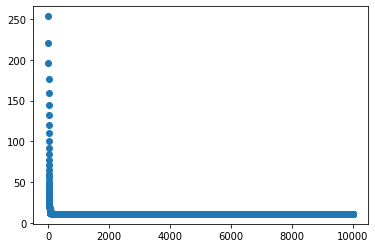

In [67]:
# Plotting the cost vs epoch 
epoch_range = list(range(0, epochs))

plt.scatter(epoch_range, cost_list)

- As we can see, the cost reduced drastically initially and then it saturated at a final value.
- Initially, the training was done for 10000 epochs.
- But it was understood that cost was saturating at some point. So the epochs are limited to 5000 for the final model.

## Predict test dataset using this model and calculate the accuracy of the model

In [68]:
# Predicting the test dataset using the trained model
# @ operator performs matrix multiplication between the numpy arrays on its either side
predicted = x_test @ theta
print("Predicted values for the test data: ")

# Getting the Root mean squared error
rmse = np.sqrt(np.mean((y_test - predicted)**2))

print("The Root mean squared error of the model: ", rmse)

Predicted values for the test data: 
The Root mean squared error of the model:  4.9266667110045566


### Comparing the predicted vs actual values
Let us plot the predicted values against the original values with indices of rows on the X axis and corresponding values on Y axis

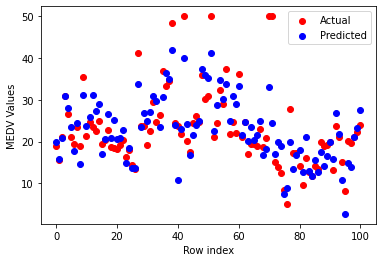

In [69]:
# Creating the scattered plot
indices = np.array(list(range(0, y_test.shape[0]))).reshape(y_test.shape[0], 1)

# Plotting the graphs
plt.scatter(indices, y_test, c = 'r', label = 'Actual')
plt.scatter(indices, predicted, c = 'b', label = 'Predicted')

# Labeling the axis
plt.xlabel('Row index')
plt.ylabel('MEDV Values')
  

# Creating the legend
plt.legend()
plt.show()

We can observe that most of the performance of our model on the test data.

